yearly production is this list:  [707400.0, 535710.0000000001, 429789.9999999998, 359120.00000000006, 308580.00000000006, 271589.99999999994, 241739.99999999977, 218440.00000000052, 198100.00000000003, 181409.99999999962] 
[121890.0, 133824.0, 126954.0, 126744.0, 127590.0, 129432.0, 132996.0, 132054.0, 122316.0, 131310.0]
the revenue is [41029200.0, 46071060.00000001, 23208659.99999999, 24061040.000000004, 19131960.000000004, 24171509.999999996, 22481819.999999978, 21625560.000000052, 19215700.000000004, 16326899.999999966]
IRR: 15.84%
[-6.78000000e+05 -2.85800000e+06 -1.16580000e+07 -2.60580000e+07
 -5.00580000e+07 -5.22580000e+07 -6.06580000e+07 -6.76580000e+07
 -4.03127500e+07 -3.32207800e+06  1.53718050e+07  3.47473810e+07
  5.01805390e+07  6.96471800e+07  8.77656330e+07  1.05198135e+08
  1.20693011e+08  1.33885842e+08]


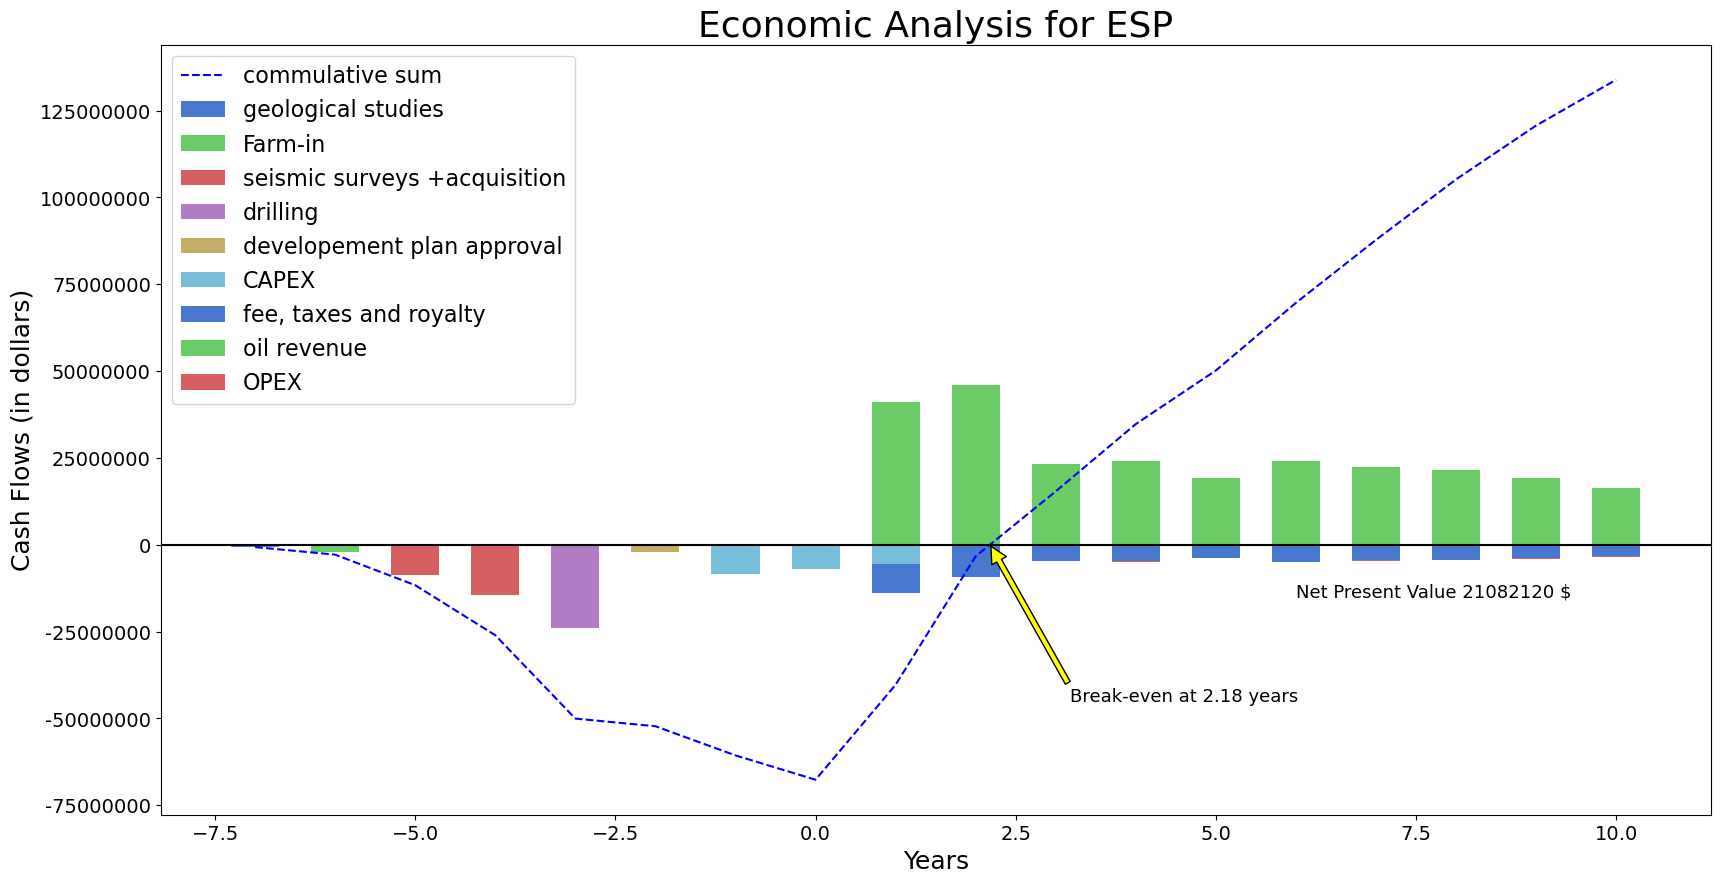

Net present value: 21082120.232068796


In [8]:
#https://blog.finxter.com/how-to-read-and-write-excel-files-with-pandas/
#https://www.statology.org/pandas-skip-rows/
#https://towardsdatascience.com/creating-a-dual-axis-combo-chart-in-python-52624b187834
#https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size
#https://stackoverflow.com/questions/60512225/python-matplotlib-find-the-corresponding-x-value-of-a-given-y-value-on-a-basic#:~:text=You%20can%20use%20np.,to%20switch%20to%20y_interp%20%3D%20np.
#https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/


import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
# last one is imported specifically to convert y ais labels to integer

#New NPV program
# the modification will enable the user to use the program multiple time using the 
#newly user defined function (Economic_Plot) and class (Economic_Analysis)



class Economic_Analysis: 
    def __init__(self, capex, discount_rate, production, prices, opex):
        self.capex = capex
        self.discount_rate = discount_rate
        self.production = production
        self.prices = prices
        self.opex= opex
    def Economic_Plot(self): 
        
        ################ FINDING POSITIVE CASH FLOW, NEGATIVE CASH FLOW, NET PRESENT VALUE AND COMMULATIVE CASH FLOW
        # Calculation
        #                  geo studies(1)  Farm-in(1),   seismic-survey (2)     driliing (1), developement approval (1)
        # -1,0,1, for capex      -7        -6      -5        -4         -3        -2     
        pre_developement_cost=[-678000, -2180000, -8800000, -14400000, -24000000, -2200000]
        
        # i will starts from first value and go till last value so we need to give a range so for i in range(len())
        oil_revenue=[self.production[i] * self.prices[i] for i in range(len(self.production))]
        oil_revenue_tenure= list(range(len(oil_revenue)+1)[1:])
        print(f'the revenue is {oil_revenue}')
        # revenue range starts from 1 and end at len(). [0,1,2,3]-->[1,2,3,4]
        # i am assuming taxes of 20%
        taxes=[int(oil_revenue[i]*0.2) for i in range(len(oil_revenue))]
        taxes=[taxes[i]*-1 for i in range(len(taxes))] #making tax negative
        taxes_tenure= list(range(len(taxes)+1)[1:])
        #changing opex to negative
        opex=[self.opex[i]*-1 for i in range(len(self.opex))]
        opex_tenure= list(range(len(self.opex)+1)[1:])      
        
        cash_flows = pre_developement_cost+ list(np.array(self.capex+list(np.zeros(len(oil_revenue)-1))) 
                                                          +np.array(list(np.zeros(len(self.capex)-1))+oil_revenue)
                                                          +np.array(list(np.zeros(len(self.capex)-1))+taxes) 
                                                          +np.array(list(np.zeros(len(self.capex)-1))+self.opex))
        internal_rate_of_return = npf.irr(cash_flows)
        print("IRR: {:.2%}".format(internal_rate_of_return))
        # [1,2,3,4] + [4,5] = [1,2,3,4,4,5] addition of list
        #[1 2 3 4] + [1 1 1] = ERROR
        #[1 2 3 4] + [1 1 1 1] = [2 3 4 5] adddition of array
        #cash flow will be a list with len(pre_developement_cost)+1 overlappong entry of capex + len(oil_revenue) 
        #list has values in [] bracket
        #net present value
#         print(len(cash_flows))
#         print(cash_flows)
        npv = npf.npv(self.discount_rate, cash_flows)

        # Plotting positive and negative cash flows
#         positive_cash_flows = [c for c in cash_flows if c > 0]
#         negative_cash_flows = [c for c in cash_flows if c < 0]
        # c is any item of cash_flow
        
        # now finding the commulative sum using the builtin formula
        commulative_sum=np.cumsum(cash_flows)
        print(commulative_sum)
        
        ################ GENERATING THE DUAL DATA ECONOMIC PLOT
        #generaating dual plot
        fig, ax = plt.subplots()
        # this specific command is used to add multiple plots in the programm and the value in them is added using 
        #ax.xlabel, ax.ylabel etc etc. this is only used to add bar labels 
        plt.gcf().set_size_inches(20, 10)
        ax.plot(list(range(-7,len(oil_revenue)+1)),commulative_sum, "--b", label ="commulative sum")
        #this tweek allows [0,1,2,3,4] to become [1,2,3,4,5]
        plt.style.use('seaborn-muted')
        bar_1=ax.bar(list(range(-7,-6)), pre_developement_cost[:1], label="geological studies" , width =0.6 )
        bar_2=ax.bar([-6], pre_developement_cost[1:2], label="Farm-in" ,width =0.6  )        
        bar_3=ax.bar(list(range(-5,-3)), pre_developement_cost[2:4], label="seismic surveys +acquisition" , width =0.6 )
        bar_4=ax.bar([-3], pre_developement_cost[4:5], label="drilling" ,width =0.6  )
        bar_5=ax.bar(list(range(-2,-1)), pre_developement_cost[5:6], label='developement plan approval' , width =0.6 )
        bar_6=plt.bar(list(range(-1,2)), self.capex, label="CAPEX" , width =0.6 )
        # the bottom should have equal number of y values (y of taxes(i.e, 11)= y to put below) but since 
        #only one of capex was merging we need to falsly genertae 10 more with zero value
        # bottom = merging columns below (1) + my own column withoout merge (10) as [0,0,0] 
        len_of_unmerged_tax=len(taxes)-len(self.capex[2:3]) # should give 10 if taxes are 11 and 1 is merging
        bottom_col_of_capex=self.capex[2:3] +list((range(len_of_unmerged_tax)[i]*0 for i in range(len_of_unmerged_tax)))
        bar_7=plt.bar(taxes_tenure, taxes,bottom=bottom_col_of_capex,  label="fee, taxes and royalty" ,width =0.6)
        # now to crete opex curve,
        #in tax we have one column below let say if tax is [10,20,30] and only capex is below as [20,0,0]
        #the tax will start as [30,20,30] easy peasy, 
        #but now we have to add two datas below capex [20,0,0] and taxes [30,20,30]. it cant be done by simple list addition
        # new bottom 
        #
        bar_8=plt.bar(oil_revenue_tenure, oil_revenue, label="oil revenue" , width =0.6 )
        bar_9=plt.bar( opex_tenure ,opex, bottom=np.array(bottom_col_of_capex) + np.array(taxes)  ,label="OPEX", width =0.6 )
        
        #the below command is not working, don't know why
        plt.subplots_adjust(wspace=0.1)
        
        
        # was finding the way to stack unequal length figures
               
        #bar_8=plt.bar(list(range(len(self.opex)+1)[1:]),self.opex, bottom=capex+, label="fee, taxes and royalty")
        # # bar_1=ax.bar(list(range(len(positive_cash_flows)+1)[1:]), positive_cash_flows, edgecolor='black',label="positive cash flows")
        # # bar_2=ax.bar(list(range(len(negative_cash_flows))), negative_cash_flows, edgecolor='black', label="negative cash flows")
       
        # in bar method, first input specify the number of bar chart boxes or x axis value, 2nd input specify the values to use in y-axis, 
        #plt.ylim(min(cash_flows)*1.3, max(cash_flows)*1.9)
        ax.axhline(y=0, color='black') # the mid line will pass through y=0 and i colored black
        
        plt.xlabel('Years',fontsize=18)
        plt.ylabel('Cash Flows (in dollars)',fontsize=18)
        plt.title('Economic Analysis for ESP',fontsize=26)
        plt.legend(loc="upper left", fontsize=16)
        
        
        #for below lines, padding is the spce between the bar box and the bar label
        # gives the format to be used. i have specify that it will take zero decimal after decimal point and add $ dollar sign with each
#         ax.bar_label(bar_1,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_2,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_3,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_4,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_5,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_6,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_7,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_8,fmt='%.0f$', padding=3)
#         ax.bar_label(bar_9,fmt='%.0f$', padding=3)
        
        #increase the fontsize of xaxis and y axis numerical values
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        #above line changes the y axis display from 1.06 e +6 to 1060000 or u can say with no decimal point
        #the last thing imported is for this line only

        ############### PLOTTING THE BREAKEVEN POINT 

        # this numpy function will give us x intercept for y=0 i.e, when net cash flow is zero (breakeven point)
        #np.intercept(x value,x,y) or np.intercept(y value,y,x)
        #roundedNumber = round(inputNumber, 2) ; to get round upto 2 decimal palces i.e, 4.46 years instead of 4.4623583 years
        breakeven = round(np.interp(0,commulative_sum , list(range(-7,len(oil_revenue)+1))),2)
        # xy= (x,y) =location of point to be plotted; xytext location of start of arrow and the text 'breakeven point' 
        # f' has the same function as in print statement 
        ax.annotate(f'Break-even at {breakeven} years', xy =(breakeven, 0), xytext =(breakeven+1,-45000000), 
                arrowprops = dict(facecolor ='yellow', shrink = 0.01),fontsize=13,)
        ax.annotate(f'Net Present Value {int(npv)} $', xy =(6, -15000000),fontsize=13)
        plt.show()
        # Output
        print("Net present value:", npv)
        return npv
        

# now we can use the above program as many time as we want. the order of inserting data would be like this
#(capex, discount_rate, production, prices):


a= [-8400000, -7000000, -5600000]  #capex or capital expenditure
b= 0.10    #discount rate


#INSERTING THE DATA FOR PRODUCTION
filepath_for_test = 'D:/educational/petroleum engg/FYP/Python excel files/ESP production10.xlsx'
df = pd.read_excel(filepath_for_test, sheet_name='Sheet', usecols=[21], skiprows=26, nrows=121, dtype ={'0':float})  
#here i have used column # 22 (index #21), have skipped first 26+1 rows, and taken 121 rows in total
#the data will be a panda column with column named as Unnamed: 21 because my data did't have a heading
c=list(df['Unnamed: 21']) #c will be list of 121 rows


yearly_production_data= []
for i in range(int(len(c)/12)): 
    production_per_year=c[12*(i+1)]- c[12*i]
    yearly_production_data.append(production_per_year*10000) 
    #multiplying with 10^6 will convert MMscf to Scf, to counter price which was in $/STB
    #yearly roduction data will be list of 7 iteams 
c=yearly_production_data
print(f'yearly production is this list:  {c} ')

# now i am collecting the data for cost of oil. for the moment single file has both data
filepath_cost = 'D:/educational/petroleum engg/FYP/Python excel files/Cost data but csv.csv'
df=pd.read_csv(filepath_cost, skiprows=[1], nrows= len(c), dtype={"prices": float}) 
# skiprow skip the row with $ per barrel heading and dtype convert the data in integer form so that it couldbe used later
#nrows will take values equal to the length of production that is 7 
d =list(df['prices'])   #oil price 



filepath_opex = 'D:/educational/petroleum engg/FYP/Python excel files/Cost_Calculation_for_FYP.xlsx'
df=pd.read_excel(filepath_opex, sheet_name='ESP' , nrows= len(c), dtype={"operating cost": float})
e =list(df['operating cost'])   #opex
print (e)
   


case1=Economic_Analysis(a, b, c, d,e)
case1_plot =case1.Economic_Plot()
# print(case1_plot)